# Прогнозирование временных рядов на карте

**Задача этого проекта** — научиться предсказывать количество поездок в ближайшие часы в каждом районе Нью-Йорка. Для того, чтобы её решить, сырые данные необходимо агрегировать по часам и районам. Агрегированные данные будут представлять собой почасовые временные ряды с количествами поездок из каждого района. Похожие задачи возникают на практике, если вам необходимо спрогнозировать продажи большого количества товаров в большом количестве магазинов, объём снятия денег в сети банкоматов, посещаемость разных страниц сайта и т.д.

# Жёлтое такси в Нью-Йорке

Нью-Йоркская комиссия по такси и лимузинам (TLC) предоставляет подробные анонимизированные данные о поездках клиентов с 2009 года. Машины, выкрашенные жёлтым, имеют право брать пассажиров на улицах в любом из пяти боро города.

Сырые данные о поездках в жёлтом такси можно найти на сайте [TLC:](www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) Эти данные разбиты на файлы по месяцам. В каждом из файлов содержится следующая информация о поездках:

* время начала поездки
* время окончания поездки
* долгота и широта точки начала поездки
* долгота и широта точки окончания поездки
* количество пассажиров
* расстояние по счётчику
* тип тарифа (одна из шести категорий)
* способ оплаты (одна из шести категорий)
* стоимость поездки по счётчику
* налог на счётчик
* доплата за поездки в пиковые часы и ночью
* доплата за проезд по платным дорогам
* доплата за проезд, взимаемая с каждой поездки с января 2015
* размер чаевых
* общая стоимость поездки
* провайдер данных (одна из двух категорий)
* бинарный флаг, показывающий, были ли данные о поезде получены немедленно после её окончания, или какое-то время хранились в памяти автомобиля.

Подробнее: http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Задача проекта — научиться предсказывать количество поездок в ближайшие часы в каждом районе Нью-Йорка; для простоты мы определим прямоугольные районы. Для того, чтобы её решить, сырые данные необходимо агрегировать по часам и районам. Агрегированные данные будут представлять собой почасовые временные ряды с количествами поездок из каждого района.

Задачу прогнозирования таких рядов можно решать с помощью авторегрессионных моделей, прогнозируя каждый ряд независимо. Ряды явно имеют сложную сезонность — суточную, недельную и годовую, поэтому для их моделирования понадобится использовать модель ARIMA с дополнительной регрессией на внешние признаки.

Чтобы улучшить такую модель, можно попытаться учесть:

* взаимосвязи между рядами
* дополнительные параметры поездок, которые можно посчитать по исходным данным
* внешние календарные и географические признаки

В ходе выполнения проекта вы научитесь:

* работать с геоданными
* прогнозировать временные ряды сложной структуры
* строить и настраивать регрессионные модели, делающие совместные предсказания для большого количества взаимосвязанных рядов

Похожие задачи возникают на практике, если вам необходимо спрогнозировать продажи большого количества товаров в большом количестве магазинов, объём снятия денег в сети банкоматов, посещаемость разных страниц сайта и т.д.

В ходе выполнения проекта у вас будет свобода выбора хода решения, используемых средств анализа, библиотек и моделей. Также обратите внимание, что для его успешного выполнения вам нужно будет скачать и обработать от 10 до 200 гигабайт сырых данных.

# Знакомство с данными и агрегация

Скачайте сырые данные о поездках жёлтого такси с сайта TLC: www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

Поездки зелёного такси и лимузинов нас не интересуют!

Данные выложены в файлах по месяцам. Скачайте так много данных жёлтого такси, как сможете; чем больше вы будете использовать данных, тем точнее получатся ваши прогнозы. Если вы решите использовать не все данные, а только часть, выбирайте её по времени с конца. Абсолютный минимум необходимых данных — 6 месяцев: один, последний месяц, вам понадобится для тестирования, предшествующие 5 — для обучения. По 5 месяцам можно построить прогнозы, учитывающие дневную и недельную сезонности, но в данных есть и годовая. Чтобы её учесть, необходимы данные как минимум за 2 года.

Обработайте сырые данные по следующей схеме.

1. Почистите данные от ошибок и аномалий.
2. Отбросьте минуты и секунды во времени начала поездки.
3. Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.
4. Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.

В дальнейшем, когда вы будете предсказывать получившиеся ряды, нужно будет загружать ваши прогнозы на kaggle, поэтому нужно, чтобы идентификаторы ячеек были определены однозначно. В следующем файле даны идентификаторы ячеек, которые вам нужно использовать, и географические координаты их границ:

[regions.csv](https://stepik.org/media/attachments/lesson/90609/_5fd0fb3db5dfaaafa4d9fc4c00dd5ea8_regions.csv)

Для сдачи задания этой недели вам нужно агрегировать только данные за май 2016, но, когда задание будет сдано, не забудьте запустить ваш агрегирующий скрипт на всех остальных месяцах, которые вы собираетесь использовать при прогнозировании.

Чтобы сдать задание, выполните следующую последовательность действий.

1. Загрузите данные за май 2016 года.

2. Проведите фильтрацию: удалите поездки с

* нулевой длительностью
* нулевым количеством пассажиров
* нулевым расстоянием поездки по счётчику
* координатами начала, не попадающими в прямоугольник Нью-Йорка

Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.

3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.

5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

7. Загрузите ноутбук в форму ниже

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import time
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binned_statistic_2d
from datetime import date

In [0]:
# координаты нью-йорка
ny_longitude_west = -74.25559
ny_longitude_east = -73.70001
ny_latitude_north = 40.91553
ny_latitude_south = 40.49612

### 1. Загрузите данные за май 2016 года.

In [0]:
data_taxi = pd.read_csv('/content/gdrive/My Drive/DATA/Stepik/yellow_tripdata_2016-05.csv')

In [0]:
data_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


### 2. Проведите фильтрацию: удалите поездки с

* нулевой длительностью
* нулевым количеством пассажиров
* нулевым расстоянием поездки по счётчику
* координатами начала, не попадающими в прямоугольник Нью-Йорка


In [0]:
# информация по данным
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [0]:
# размер дата сета
data_taxi.shape

(11836853, 19)

In [0]:
# перевожу объекты в другой тип для двух колонок
data_taxi['tpep_pickup_datetime'] = pd.to_datetime(data_taxi['tpep_pickup_datetime'])

In [0]:
data_taxi['tpep_dropoff_datetime'] = pd.to_datetime(data_taxi['tpep_dropoff_datetime'])

In [0]:
# вычеслю продолжительность поездки и помещу данные в массив
duratin_trip = data_taxi['tpep_dropoff_datetime'] - data_taxi['tpep_pickup_datetime']

In [0]:
# вставляю колонку с продолжительностью поездки
data_taxi.insert(3, 'duratin_trip', duratin_trip)

In [0]:
data_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duratin_trip,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [0]:
data_taxi['duratin_trip'] = data_taxi['duratin_trip'].dt.components['days'] * 86400 + data_taxi['duratin_trip'].dt.components['hours'] * 3600 + \
data_taxi['duratin_trip'].dt.components['minutes'] * 60 + data_taxi['duratin_trip'].dt.components['seconds']

In [0]:
# удаляю с нулевой длительностью
data_taxi = data_taxi[data_taxi['duratin_trip']!=0]
data_taxi.shape

(11824585, 20)

In [0]:
# удаляю с нулевым количеством пассажиров
data_taxi = data_taxi[data_taxi['passenger_count']!=0]
data_taxi.shape

(11824063, 20)

In [0]:
# удаляю с нулевым расстоянием поездки по счётчику
data_taxi = data_taxi[data_taxi['trip_distance']!=0]
data_taxi.shape

(11763422, 20)

In [0]:
# координатами начала, не попадающими в прямоугольник Нью-Йорка
data_taxi = data_taxi[(data_taxi['pickup_longitude'] <= ny_longitude_east) & (data_taxi['pickup_longitude'] >= ny_longitude_west) &\
 (data_taxi['pickup_latitude']>=ny_latitude_south) & (data_taxi['pickup_latitude']<=ny_latitude_north)]

In [0]:
data_taxi.shape

(11626521, 20)

In [0]:
# сохраню подчищенный вариант для будущего использования
data_taxi.to_csv('/content/gdrive/My Drive/DATA/Stepik/yellow_tripdata_2016-05_my.csv', index=False)

### 3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

In [0]:
region = pd.read_csv('/content/gdrive/My Drive/DATA/Stepik/regions.csv', delimiter=';')

In [0]:
region.shape

(2500, 5)

In [0]:
region.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [0]:
data_taxi = pd.read_csv('/content/gdrive/My Drive/DATA/Stepik/yellow_tripdata_2016-05_my.csv')

In [0]:
data_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duratin_trip,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1051,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,451,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,421,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1187,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,399,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [0]:
# введем колонку часы
hour_trip = data_taxi['tpep_pickup_datetime'].dt.hour

In [0]:
# вставляю колонку с часом поездки
data_taxi.insert(3, 'hour', hour_trip)

In [0]:
# функции для перевода координат в условиях 50 на 50

def long_ref(val):
  return np.floor((val - ny_longitude_west)*50/(ny_longitude_east-ny_longitude_west))

def lat_ref(val):
  return np.floor((val - ny_latitude_south)*50/(ny_latitude_north-ny_latitude_south))

def find_reg(long, lat):
  return ((long_ref(long))*50 + lat_ref(lat))

In [0]:
find_reg(data_taxi.iloc[0].pickup_longitude, data_taxi.iloc[0].pickup_latitude)

1232.0

In [0]:
data_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,hour,duratin_trip,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,0,1051,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,0,451,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,0,421,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,0,1187,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,0,399,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [0]:
# добавим колонки с измененными данными
data_taxi['piсkap_longitude_idx'] = data_taxi['pickup_longitude'].apply(long_ref)
data_taxi['piсkap_latitude_idx'] = data_taxi['pickup_latitude'].apply(lat_ref)

In [0]:
# создаем колонку с регионом старта и заполняем ее данными
data_taxi['region'] = (data_taxi.piсkap_longitude_idx - 1)*50.0 + data_taxi.piсkap_latitude_idx

In [0]:
id_bin = np.arange(0, 2501)

In [0]:
# выкенем незадействованные колонки

data_taxi = data_taxi.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',\
                                    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], axis = 1)

In [0]:
# сохраню подчищенный вариант для будущего использования и с добавленными колонками

data_taxi.to_csv('/content/gdrive/My Drive/DATA/Stepik/yellow_tripdata_2016-05_my.csv', index=False)

In [0]:
data_taxi = pd.read_csv('/content/gdrive/My Drive/DATA/Stepik/yellow_tripdata_2016-05_my.csv')

In [0]:
def time_bin_gen(date):
    current = date.year*1e6 + date.month*1e4 + date.day*1e2 + date.hour  
    return current

In [0]:
# создаю колонку с объединенной датой и часом поездки
data_taxi['timestamp'] = data_taxi.tpep_pickup_datetime.apply(lambda d: time_bin_gen(d))

In [77]:
data_taxi.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,hour,duratin_trip,passenger_count,trip_distance,pickup_longitude,pickup_latitude,piсkap_longitude_idx,piсkap_latitude_idx,region,timestamp
0,2016-05-01,2016-05-01 00:17:31,0,1051,1,3.60,-73.985901,40.768040,24.0,32.0,1182.0,2.016050e+09
1,2016-05-01,2016-05-01 00:07:31,0,451,1,1.68,-73.991577,40.744751,23.0,29.0,1129.0,2.016050e+09
2,2016-05-01,2016-05-01 00:07:01,0,421,6,1.09,-73.993073,40.741573,23.0,29.0,1129.0,2.016050e+09
3,2016-05-01,2016-05-01 00:19:47,0,1187,1,4.21,-73.991943,40.684601,23.0,22.0,1122.0,2.016050e+09
4,2016-05-01,2016-05-01 00:06:39,0,399,1,0.56,-74.005280,40.740192,22.0,29.0,1079.0,2.016050e+09


In [0]:
time_bin = np.unique(data_taxi.timestamp)

In [0]:
time_bin = np.arange(0, 25)
id_bin = np.arange(0, 2501)

In [0]:
res = binned_statistic_2d(data_taxi.region, data_taxi.timestamp, data_taxi.region, statistic='count', bins=[id_bin,len(time_bin)])

In [81]:
res.statistic

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
res.statistic.shape

(2500, 744)

### 4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.

In [83]:
np.unique(res.statistic[:10, :])

array([0.])

In [84]:
np.unique(res.statistic)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 7.235e+03, 7.285e+03,
       7.600e+03])

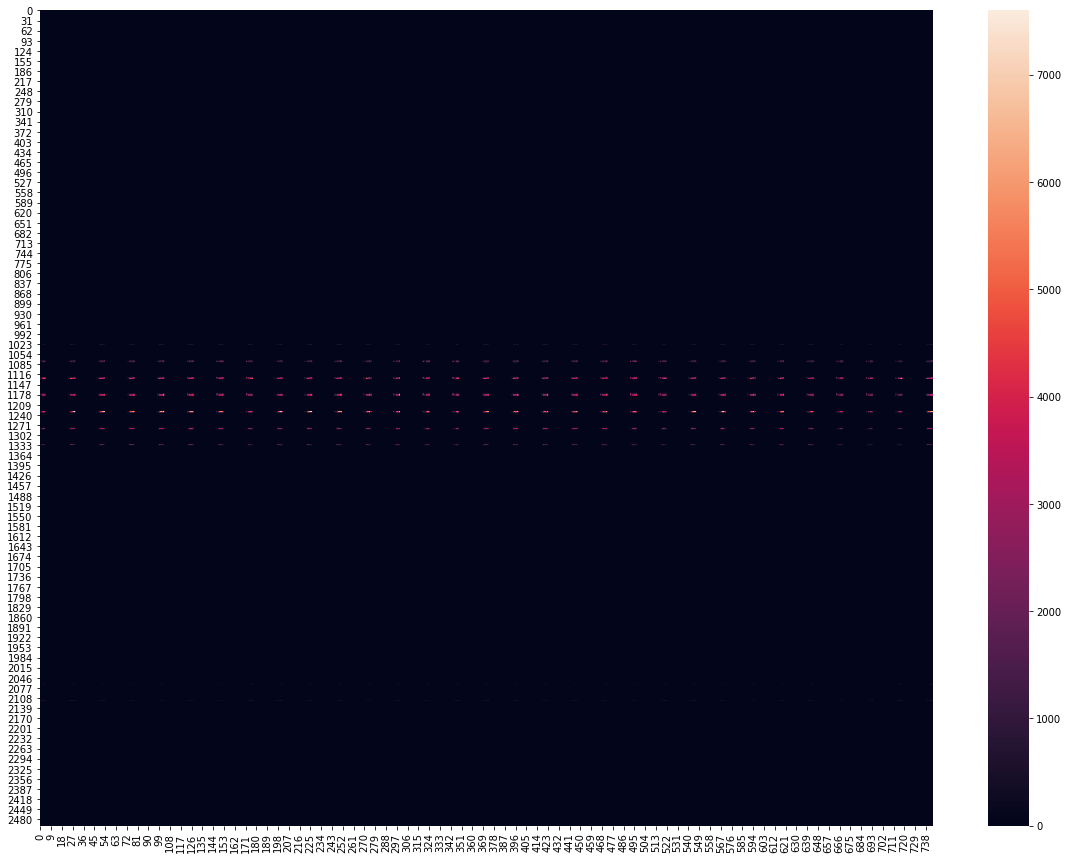

In [89]:
plt.figure(figsize = (20, 15))
sns.heatmap(res.statistic)

Не было поездок в первых десяти регионах

### 5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

In [93]:
# нахожу номер региона
empire_latitude = 40.748817
empire_longitude = -73.985428
empire_region = int(find_reg(empire_longitude, empire_latitude))
empire_region

1230

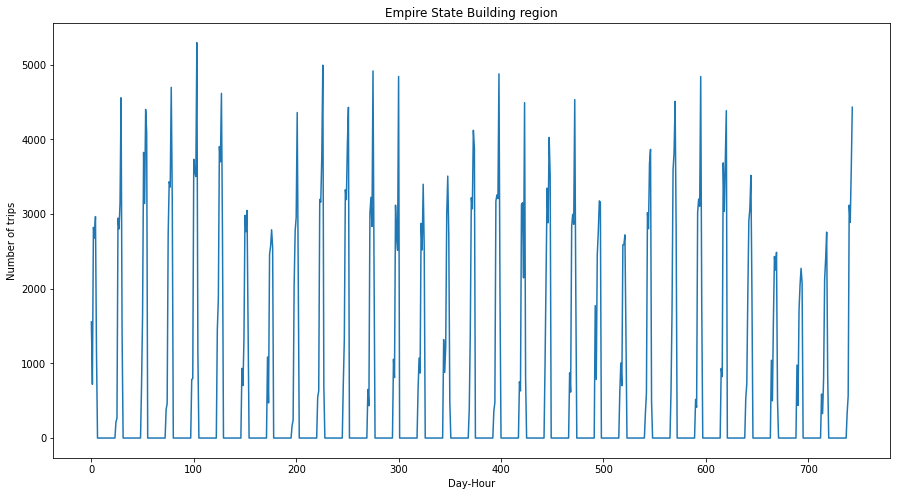

In [105]:
plt.figure(figsize=(15,8))
plt.plot(res.statistic[empire_region])
plt.ylabel("Number of trips")
plt.xlabel("Day-Hour")
plt.title("Empire State Building region");

### 6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

In [106]:
# количество ячеек с нулевым значением
np.size(res.statistic) - np.count_nonzero(res.statistic)

1803460

In [107]:
# общее количество ячеек
np.size(res.statistic)

1860000